# Mini Programming Assignment: Comparing Search Algorithm Performance

**Name:** Ben Prescott

**Date:** 6/25/2021

**Course:** MSDS432 Summer 2021

#### Executive Summary

**Description:**

This notebook provides a comparison of execution speeds between linear search and binary search algorithms. Both algorithms may be leveraged for finding and returning a result, such as a search engine (ex: Google) or finding a product in an app on your phone. The methods of how linear search and binary search identify and return a result differ.

**Algorithm Explanations**

Binary search is an algorithm that leverages a sorted list and starts guessing near the middle. For example, if a sorted list were items that a store sells, we would order the list (possibly by item ID) and use binary search to find an item we're looking for. Binary search would start in the middle and if the item ID were lower (or higher) than the middle number, it would only focus on the lower (or upper) half of the list. It would do the same thing again, starting at the new middle of the shortened list and guessing until it finds the item ID we're looking for.

Linear search works in more of a sequential manner, where it may start somewhere within the list, then use a "guess is too high" or "guess is too low" approach to move one number higher or lower. Where binary search requires our list of store items to be sorted first, linear search does not. 

**Approach**

I started by creating five buckets of numbers, each containing numbers from 0 to 10,000. The total count of numbers in each array was 512, 1024, 2048, 4096, and 8192 respectively. This would mean that not every number 0 to 10,000 were included, so I randomly generated numbers from 0 to 10,000 and ensured they were generated evenly (uniformly). Each bucket of numbers was then sent through the binary search algorithm and linear search algorithm to find where in the bucket the largest number existed. Due to both algorithms operating differently, the time it took for each of them to find the largest number varied. It also took time to sort the list to support binary search. These times were recorded and compared. 

Algorithm execution times were measured in fractions of a second and follow what is known as "Big O" notation. Big O notation describes the slowest possible execution time for an algorithm based on the number of operations. Linear search follows O(n), or linear time, where n is the number of operations it may take to find the answer. In the case of a bucket with 4096 items, it may take 4096 operations. Binary search follows O(log n) time, or logarithmic time. In the case of the bucket with 4096, the most operations binary search may take to find the answer is 12. 

**Results**

The results of binary vs linear search show that binary search is significantly faster, once the list of numbers has been pre-sorted. For the first bucket of 512 numbers, binary search is approximately 5 times faster than linear search. The next following buckets are approximately 6 - 7 times faster in execution times. 

However, as binary search needs the list to be sorted first, we can add the time it takes to sort the list to the binary execution times. Sorting the list is actually a lengthy process, especially with the larger buckets of numbers, slowing down the overall sorting plus binary execution times. Considering the binary search algorithm follows O(log n) time, the performance degredation will be lessened in comparison to linear search with larger numbered lists. 

In [632]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [622]:
# Define the BinarySearch class
# Used the base code and added functions for number generation and array sorting
# Also added time tracking and additional output context to binary/linear search

class BinarySearch():

    def search_iterative(self, list, item):
    # low and high keep track of which part of the list you'll search in.
        np.random.seed(10)
        start = timer()
        low = 0
        high = len(list) - 1

        # While you haven't narrowed it down to one element ...
        while low <= high:
          # ... check the middle element
          mid = (low + high) // 2
          guess = list[mid]
          # Found the item.
          if guess == item:
            end = timer()
            itertime = "{:.8f}".format(float(end-start))
            print('Number {} found at position {} in {:.20f} seconds'.format(item, mid,end-start))
            return itertime
          # The guess was too high.
          if guess > item:
            high = mid - 1
          # The guess was too low.
          else:
            low = mid + 1

    # Item doesn't exist
        end = timer()
        itertime = "{:.8f}".format(float(end-start))
        print('Number not found and it took {0:.20f} seconds'.format(end-start))
        return None, itertime

    def search_recursive(self, list, low, high, item):
        # Check base case
        np.random.seed(10)
        start = timer()

        if high >= low: 

            mid = (high + low) // 2
            guess = list[mid]

            # If element is present at the middle itself 
            if guess == item:
                end = timer()
                bintime = "{:.8f}".format(float(end-start))
                print('Number {} found at position {} in {:.20f} seconds'.format(item, mid,end-start))
                return bintime

            # If element is smaller than mid, then it can only 
            # be present in left subarray 
            elif guess > item: 
                return self.search_recursive(list, low, mid - 1, item) 

            # Else the element can only be present in right subarray 
            else: 
                return self.search_recursive(list, mid + 1, high, item) 

        else: 
            end = timer()
            bintime = "{:.8f}".format(float(end-start))
            print('Number not found and it took {0:.20f} seconds'.format(end-start))
        # Element is not present in the array 
        return None, bintime
    

    def numGen(self, firstNum, lastNum, arraysize1, arraysize2, arraysize3, arraysize4, arraysize5):
        np.random.seed(10)
        array1 = np.random.randint(firstNum, lastNum, arraysize1)
        array2 = np.random.randint(firstNum, lastNum, arraysize2)
        array3 = np.random.randint(firstNum, lastNum, arraysize3)
        array4 = np.random.randint(firstNum, lastNum, arraysize4)
        array5 = np.random.randint(firstNum, lastNum, arraysize5)
        return array1, array2, array3, array4, array5

    def sortArray(self, array):
        np.random.seed(10)
        start = timer()
        array.sort()
        end = timer()
        outtime = "{:.8f}".format(float(end-start))
        arlen = len(array)
        print('Array sorted in {0:.20f} seconds'.format(end-start))
        return outtime, arlen

In [705]:
bs = BinarySearch() # Define binary search as a variable

array512, array1024, array2048, array4096, array8192 = bs.numGen(0, 10000, 512, 1024, 2048, 4096, 8192) # Generate the five arrays

arrayList = [array512,array1024,array2048,array4096,array8192] # Creating a list of the array for future use

arrayNames = ['array512','array1024','array2048','array4096','array8192'] # Creating a list of names for Pandas index naming

In [706]:
bs = BinarySearch() # Re-defining the search class just for sanity sake

linear_list = [] # List for linear search times 
binary_list = [] # List for binary search times
sorted_times_list = [] # List for sorting times
array_length_list = [] # List for tracking the array lengths for plotting
bin_plus_sorted_times = [] # List for binary + sorting times

for array in arrayList:
    sortedTime, arrayLength = bs.sortArray(array)
    binary = bs.search_recursive(array,min(array),len(array),max(array))
    linear = bs.search_iterative(array,max(array))
    bin_sorted = float(binary) + float(sortedTime)
    binary_list.append(binary)
    linear_list.append(linear)
    sorted_times_list.append(sortedTime)
    array_length_list.append(arrayLength)
    bin_plus_sorted_times.append(bin_sorted)

Array sorted in 0.00003200001083314419 seconds
Number 9977 found at position 511 in 0.00000130000989884138 seconds
Number 9977 found at position 511 in 0.00000700000964570791 seconds
Array sorted in 0.00022519999765790999 seconds
Number 9985 found at position 1023 in 0.00000200000067707151 seconds
Number 9985 found at position 1023 in 0.00001360000169370323 seconds
Array sorted in 0.00011730000551324338 seconds
Number 9977 found at position 2047 in 0.00000230000296141952 seconds
Number 9977 found at position 2047 in 0.00001380000321660191 seconds
Array sorted in 0.00127380000776611269 seconds
Number 9998 found at position 4095 in 0.00000230000296141952 seconds
Number 9998 found at position 4095 in 0.00001509999856352806 seconds
Array sorted in 0.00053830000979360193 seconds
Number 9999 found at position 8191 in 0.00000189999991562217 seconds
Number 9999 found at position 8191 in 0.00001679999695625156 seconds


In [707]:
# Creating a pandas dataframe with the array name, length, and excution times
data = {'array_name':arrayNames,'array_length':array_length_list, 'sort_time':sorted_times_list,'linear_time':linear_list,'binary_time':binary_list,'binary_plus_sorted':bin_plus_sorted_times}
df = pd.DataFrame(data).set_index('array_name')
df.iloc[:,1:] = round(df.iloc[:,1:], 20)
df

,array_length,sort_time,linear_time,binary_time,binary_plus_sorted
array_name,,,,,
array512,512,0.00003200,0.00000700,0.00000130,0.000033
array1024,1024,0.00022520,0.00001360,0.00000200,0.000227
array2048,2048,0.00011730,0.00001380,0.00000230,0.000120
array4096,4096,0.00127380,0.00001510,0.00000230,0.001276
array8192,8192,0.00053830,0.00001680,0.00000190,0.000540


<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Algorithm Execution Times - Slowest to Fastest')

Text(0.5, 0, 'Array Length')

Text(0, 0.5, 'Execution Time')

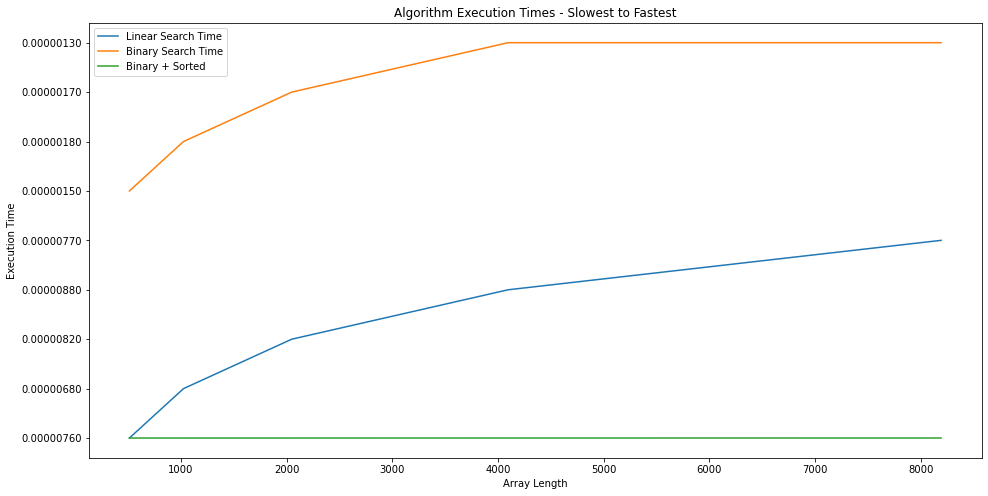

In [703]:
# Plotting linear times, binary times, and binary + sorted times for visualization
plt.figure(figsize=(16,8))
plt.title('Algorithm Execution Times - Slowest to Fastest')
plt.plot(df.array_length, df.linear_time, label='Linear Search Time')
plt.plot(df.array_length, df.binary_time, label='Binary Search Time')
plt.plot(df.array_length, df.binary_plus_sorted, label='Binary + Sorted')
plt.xlabel('Array Length')
plt.ylabel('Execution Time')
plt.legend()
plt.show()